### **Upload the data into Google Colab**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


### **1. Importing the required packages**

In [ ]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

#### **2. Reading and Exploring the Data**

In [ ]:
credit = pd.read_csv('creditcard.csv')

In [ ]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [ ]:
credit.shape

(56962, 30)

In [ ]:
credit.dtypes

,0
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64
V10,float64


In [ ]:
credit.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [ ]:
credit.duplicated().sum()  #print the total number of duplicate rows

np.int64(675)

In [ ]:
credit[credit.duplicated()]  #print all the duplicate rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
1181,2.010213,0.063667,-1.620606,0.341472,0.368741,-0.586677,0.034489,-0.043750,0.303938,-0.201902,...,-0.301625,-0.820824,0.362729,0.595190,-0.345739,0.150098,-0.066713,-0.040558,1.79,0
1936,1.302378,-0.606529,-0.681986,-1.904603,1.326623,3.436312,-1.145127,0.959147,1.671302,-1.022946,...,-0.064208,-0.080587,-0.072991,1.018136,0.663575,-0.671323,0.096801,0.028697,1.00,0
2530,2.055797,-0.326668,-2.752041,-0.842316,2.463072,3.173856,-0.432126,0.727706,0.608606,-0.075186,...,0.269765,0.844627,0.020675,0.726212,0.366624,-0.398828,0.027735,-0.060282,1.00,0
2878,1.076018,-0.126284,1.320255,1.154681,-0.892714,0.356662,-0.792107,0.396302,0.630048,0.007419,...,0.071098,0.320206,0.055667,0.204490,0.230282,-0.396762,0.077135,0.024214,1.00,0
3301,1.109985,0.368032,-0.061407,1.376844,0.070437,-1.100573,0.610397,-0.487201,0.920589,-0.380884,...,-0.088583,-0.126343,-0.217999,0.358122,0.814626,-0.345815,-0.048111,0.020956,89.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56809,1.886717,-0.517305,-1.351317,-0.141112,0.586967,1.052636,-0.330743,0.353181,0.936002,-0.165864,...,-0.071110,0.074763,0.201228,-1.628444,-0.245710,0.023253,0.014937,-0.081462,20.00,0
56830,1.284143,0.462738,-0.371277,0.825644,0.464456,-0.466731,0.459673,-0.186236,-0.549594,0.204381,...,0.013440,0.084371,-0.246710,-0.325573,0.927623,-0.272459,-0.009998,-0.005489,0.89,0
56865,1.018412,1.036663,-1.689814,1.315476,1.698436,0.528807,0.331715,0.364539,-0.711798,-1.570288,...,-0.040238,0.096172,-0.092549,-1.345664,0.510305,-0.182674,0.107058,0.071818,0.89,0
56893,2.060160,0.018599,-1.072853,0.381576,0.018414,-1.063353,0.240911,-0.365617,0.382032,0.033555,...,-0.275957,-0.600087,0.325765,-0.054364,-0.267467,0.201880,-0.060525,-0.058989,1.29,0


In [ ]:
credit.drop_duplicates(inplace = True)  #remove the duplicate rows

In [ ]:
credit['Target'].value_counts()  #to check for data imbalance

,count
Target,
0,56189
1,98


In [ ]:
56189 / 56287

0.9982589230195249

In [ ]:
98 / 56287

0.0017410769804750653

### **Machine Learning Process**

In [ ]:
X = credit.drop(columns = 'Target')
y = credit['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify = y)

### **Apply the Random Forest Classifier on the Data**

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)  #here your random forest will be created

RandomForestClassifier()

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9992893942085628

#### **Note:** We should not use `accuracy_score` to check the performance of the model in the case of `imbalanced data`. Instead we should use `ROC_AUC_Score` to check the overall performance of the model.

#### To check for overfitting

In [ ]:
y_pred_train = rf_classifier.predict(X_train)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.9999777920895423

#### Calculating the roc_auc_score

In [ ]:
roc_auc_score(y_test, y_pred)

np.float64(0.8249555080975262)

#### **Draw ROC-AUC Curve on the credit card data**

In [ ]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'rf_classifier')

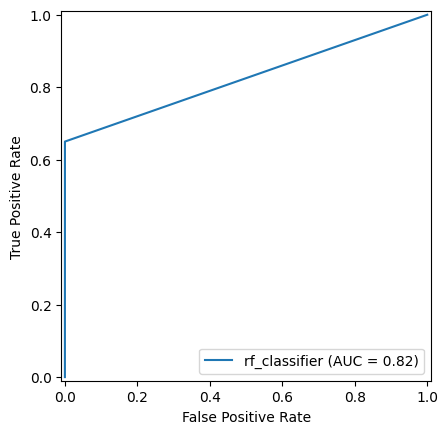

In [ ]:
import matplotlib.pyplot as plt
display.plot()
plt.show()

### When working with an imbalanced data, make sure to do these following 3 things:

1. Use a tree based algorithm for best results.
2. Use stratify=y in train_test_split function.
3. Use roc_auc_score instead of accuracy_score.

### **Let's Calculate the confusion matrix and TP, TN, FP, FN Scores**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
confusion_matrix(y_test, y_pred)

array([[11237,     1],
       [    7,    13]])

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm.ravel()  #it makes a 2d array as 1d array

array([11237,     1,     7,    13])

In [ ]:
TN, FP, FN, TP = cm.ravel()  #it makes a 2d array as 1d array

In [ ]:
print(TN, FP, FN, TP)

11237 1 7 13


In [ ]:
precision_score(y_test, y_pred)  # it matters more when reducing false positive errors is more important for us

0.9285714285714286

In [ ]:
recall_score(y_test, y_pred)  #it matters more when reducing the false negative errors is more important to us

0.65

In [ ]:
f1_score(y_test, y_pred) #it matters more when reducing both the errors are equally important for us

0.7647058823529411

### Performance Metrics used in Classification Models

1. **`Confusion Matrix`** : A confusion matrix is a table that summarizes the performance of a classification model by showing the true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

    - **`When to Use`**: The confusion matrix is useful for understanding the types of errors the model is making and for calculating other metrics like precision, recall, and specificity.
    
![confusion_matrix](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/8_confusion-matrix-python.jpg)

---

2. **`Precision Score`** : Precision is important when the cost of false positives is high, so false positives must be reduced.
    - `For example` :
        - In spam detection, a high precision ensures that most of the emails marked as spam are indeed spam and genuine emails are not marked as spam since it can be a serious problem.
        - In financial fraud detection system, it might prioritize high precision – minimizing false positives (wrongly declined transactions) to avoid inconveniencing customers.
        - While classifying whether or not a bank customer is a loan defaulter, it is desirable to have high precision since the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters.

---

3. **`Recall Score/Sensitivity`** : Recall is crucial when the cost of false negatives is high and we need to eliminate false negatives as much as possible.
    - `For Example`:
        - In medical diagnosis, a high recall is crucial since it ensures that most of the actual positive cases (e.g., diseases) are identified. False Negative would mean that we classified a patient as a healthy person which would be fatal.

---

4. **`Accuracy Score`** : It is suitable to use when the classes in the dataset are balanced. It provides a straightforward measure of overall correctness. However, it can be misleading in cases of class imbalance, where one class significantly outnumbers the other.

    - Using accuracy as a defining metric for our model makes sense intuitively, but more often than not, it is advisable to use Precision and Recall too. There might be other situations where our accuracy is very high, but our precision or recall is low. Ideally, for our model, we would like to avoid any situations where the patient has heart disease, but our model classifies as him not having it, i.e., aim for high recall.

    - On the other hand, for the cases where the patient is not suffering from heart disease and our model predicts the opposite, we would also like to avoid treating a patient with no heart disease (crucial when the input parameters could indicate a different ailment, but we end up treating him/her for a heart ailment).

    - Although we do aim for high precision and high recall value, achieving both at the same time is not possible. For example, if we change the model to one giving us a high recall, we might detect all the patients who actually have heart disease, but we might end up giving treatments to many patients who don’t suffer from it.

    - Similarly, suppose we aim for high precision to avoid giving any wrong and unrequired treatment. In that case, we end up getting a lot of patients who actually have heart disease going without any treatment.

---

5. **`F1 Score`** : We saw above that there is a trade-off between recall and precision-score. When we try to increase one, the other one starts to reduce. But sometime both the score are important.
    - `Ex`:  if the doctor informs us that the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, then we would aim for not only a high recall but a high precision as well.
    
---


6. **`ROC_AUC Score`** - Used commonly with imbalanced data.

---

7. **`Specificity`** : Specificity is a performance metric used in classification models, particularly in binary classification. It is also known as the true negative rate. Specificity measures the proportion of actual negative cases that are correctly identified by the model. This metric tells us how well the model is at identifying negative instances.
    - `Ex` : In medical testing, a high specificity is important when a false positive result could lead to unnecessary stress, further invasive testing, or treatment. For example, in cancer screening, a test with high specificity ensures that healthy individuals are not incorrectly diagnosed with cancer, avoiding unnecessary biopsies or treatments